# Evaluate Molecular Generation Results

In [ ]:
#ssh -L 8090:localhost:8090 c007

In [ ]:
!conda env list

## compare the of csv and hdf files

In [2]:
csv_path = "<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/zinc_building_blocks/Q99685_baseline_qsar_only/results/ZINC_BB_Q99685_QSAR_BASELINE_ONLY_FULL_MODEL_results.csv"

# load csv but dont read the trees column with pandas
import pandas 
csv_result = pandas.read_csv(csv_path, usecols = ["target","search_time","first_solution_time","first_solution_iteration","number_of_nodes","max_transforms","max_children","number_of_routes","number_of_solved_routes","top_score","is_solved","number_of_steps","number_of_precursors","number_of_precursors_in_stock","precursors_in_stock","precursors_not_in_stock","precursors_availability","policy_used_counts","profiling","top_scores"])
csv_result.head()

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,is_solved,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores
0,NC=CC(NOOC(F)(F)CC(F)CNCCCC1=C2CC(=O)C=CC=C3C(...,902.733842,0.0,0,4900,10,24,1637,0,0.814409,False,10,7,6,"O=C(Cl)Cl, OCC1c2ccccc2-c2ccccc21, O=C(n1ccnc1...",O=C1C=CC=C2C(CC(F)(F)F)NCC2[NH+]2C3CCCC3OC3(C(...,zinc;zinc;zinc;zinc;zinc;zinc;Not in stock,{'uspto': 4899},"{'expansion_calls': 3264, 'reactants_generatio...","0.8144, 0.7926, 0.7926, 0.7920, 0.7624"
1,CCCC1C2OCNCCC12N(F)OOC12CC1CCC13CC(CC14OC4=O)N...,900.757405,0.0,0,6205,10,26,2068,0,0.762371,False,7,5,4,"FC(F)(F)c1cccc(Br)c1, CC(C)(O)C(C)(C)O, CC(C)(...",CCCC1C2OCN(C(=O)OC(C)(C)C)CCC12N(F)OOC12CC1CCC...,zinc;Not in stock;zinc;zinc;zinc,{'uspto': 6204},"{'expansion_calls': 4140, 'reactants_generatio...","0.7624, 0.7624, 0.7624, 0.7624, 0.7609"
2,O=CCCCCCCOCCC1CCC2OCC3NCCOC4CC(c5c(Br)cccc5C(O...,900.989177,0.0,0,4829,10,33,1666,0,0.760335,False,9,5,4,"COC(OC)OC, O=CCCCCCCBr, O=C(Cl)Cl, OCC1c2ccccc...",CC(C)(C)[Si](C)(C)OCCC1CCC(O[Si](C)(C)C(C)(C)C...,zinc;zinc;Not in stock;zinc;zinc,{'uspto': 4828},"{'expansion_calls': 3211, 'reactants_generatio...","0.7603, 0.7603, 0.7601, 0.7185, 0.7149"
3,NC1CC23CC2C(CC3CNCCl)C1NC(O)CCOCCC1C(F)C2OC(O)...,900.101267,0.0,0,4716,10,31,1271,0,0.773447,False,5,5,4,"OC(F)(C(F)(F)F)C(F)(F)F, O=C1CCC(=O)N1O, O=C(O...",C[Si](C)(C)CCOC(=O)NC1CC23CC2C(CC3CNCCl)C1NC(O...,Not in stock;zinc;zinc;zinc;zinc,{'uspto': 4715},"{'expansion_calls': 3446, 'reactants_generatio...","0.7734, 0.7734, 0.7734, 0.7734, 0.7734, 0.7734..."
4,CCCCCCC1OC23C(CC=O)C4(N(F)F)C2OCNC(C(=O)n2ncnn...,900.684647,0.0,0,4950,10,22,1720,0,0.760335,False,9,5,4,"O=C(Cl)Cl, OCC1c2ccccc2-c2ccccc21, CC(C)(C)OC(...",C=CCC1C23OC(C=CCC=CC)N2C2(C(=O)n4ncnn4)NCOC3C1...,zinc;zinc;zinc;Not in stock;zinc,{'uspto': 4949},"{'expansion_calls': 3233, 'reactants_generatio...","0.7603, 0.7603, 0.7603, 0.7603, 0.7603, 0.7603..."


In [ ]:
from multiretro.utils.io import DataReader

from typing import List

def load_values(paths: List[str], key: str = "table"):
    joined_df = None
    for path in paths:
        data_hdf = DataReader.load_hdf(path, key= key)
        if joined_df is None:
            joined_df = data_hdf
        else:
            joined_df = joined_df.append(data_hdf)
            
        joined_df.reset_index(drop=True, inplace=True)
    print(joined_df.columns)
    return joined_df

In [4]:
result_hdf_path = ["<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/zinc_building_blocks/Q99685_baseline_qsar_only/results/ZINC_BB_Q99685_QSAR_BASELINE_ONLY_FULL_MODEL_results.csv_0_.hdf", "<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/zinc_building_blocks/Q99685_baseline_qsar_only/results/ZINC_BB_Q99685_QSAR_BASELINE_ONLY_FULL_MODEL_results.csv_1_.hdf"]
hdf_results = load_values(result_hdf_path)
hdf_results.head()

/tmp/ipykernel_177219/1801331223.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joined_df = joined_df.append(data_hdf)


Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees'],
      dtype='object')


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
0,0,NC=CC(NOOC(F)(F)CC(F)CNCCCC1=C2CC(=O)C=CC=C3C(...,902.733842,0.0,0,4900,10,24,1637,0,...,10,7,6,"O=C(Cl)Cl, OCC1c2ccccc2-c2ccccc21, O=C(n1ccnc1...",O=C1C=CC=C2C(CC(F)(F)F)NCC2[NH+]2C3CCCC3OC3(C(...,zinc;zinc;zinc;zinc;zinc;zinc;Not in stock,{'uspto': 4899},"{'expansion_calls': 3264, 'reactants_generatio...","0.8144, 0.7926, 0.7926, 0.7920, 0.7624","[{'type': 'mol', 'hide': False, 'smiles': 'NC=..."
1,1,CCCC1C2OCNCCC12N(F)OOC12CC1CCC13CC(CC14OC4=O)N...,900.757405,0.0,0,6205,10,26,2068,0,...,7,5,4,"FC(F)(F)c1cccc(Br)c1, CC(C)(O)C(C)(C)O, CC(C)(...",CCCC1C2OCN(C(=O)OC(C)(C)C)CCC12N(F)OOC12CC1CCC...,zinc;Not in stock;zinc;zinc;zinc,{'uspto': 6204},"{'expansion_calls': 4140, 'reactants_generatio...","0.7624, 0.7624, 0.7624, 0.7624, 0.7609","[{'type': 'mol', 'hide': False, 'smiles': 'CCC..."
2,2,O=CCCCCCCOCCC1CCC2OCC3NCCOC4CC(c5c(Br)cccc5C(O...,900.989177,0.0,0,4829,10,33,1666,0,...,9,5,4,"COC(OC)OC, O=CCCCCCCBr, O=C(Cl)Cl, OCC1c2ccccc...",CC(C)(C)[Si](C)(C)OCCC1CCC(O[Si](C)(C)C(C)(C)C...,zinc;zinc;Not in stock;zinc;zinc,{'uspto': 4828},"{'expansion_calls': 3211, 'reactants_generatio...","0.7603, 0.7603, 0.7601, 0.7185, 0.7149","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
3,3,NC1CC23CC2C(CC3CNCCl)C1NC(O)CCOCCC1C(F)C2OC(O)...,900.101267,0.0,0,4716,10,31,1271,0,...,5,5,4,"OC(F)(C(F)(F)F)C(F)(F)F, O=C1CCC(=O)N1O, O=C(O...",C[Si](C)(C)CCOC(=O)NC1CC23CC2C(CC3CNCCl)C1NC(O...,Not in stock;zinc;zinc;zinc;zinc,{'uspto': 4715},"{'expansion_calls': 3446, 'reactants_generatio...","0.7734, 0.7734, 0.7734, 0.7734, 0.7734, 0.7734...","[{'type': 'mol', 'hide': False, 'smiles': 'NC1..."
4,4,CCCCCCC1OC23C(CC=O)C4(N(F)F)C2OCNC(C(=O)n2ncnn...,900.684647,0.0,0,4950,10,22,1720,0,...,9,5,4,"O=C(Cl)Cl, OCC1c2ccccc2-c2ccccc21, CC(C)(C)OC(...",C=CCC1C23OC(C=CCC=CC)N2C2(C(=O)n4ncnn4)NCOC3C1...,zinc;zinc;zinc;Not in stock;zinc,{'uspto': 4949},"{'expansion_calls': 3233, 'reactants_generatio...","0.7603, 0.7603, 0.7603, 0.7603, 0.7603, 0.7603...","[{'type': 'mol', 'hide': False, 'smiles': 'CCC..."


In [5]:
# assert that the target column is the same for azf_results and csv_result
assert (hdf_results["target"] == csv_result["target"]).all()
# drop index column because it is the batch index
#hdf_results.drop(columns=["index"], inplace=True)
hdf_results.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
0,0,NC=CC(NOOC(F)(F)CC(F)CNCCCC1=C2CC(=O)C=CC=C3C(...,902.733842,0.0,0,4900,10,24,1637,0,...,10,7,6,"O=C(Cl)Cl, OCC1c2ccccc2-c2ccccc21, O=C(n1ccnc1...",O=C1C=CC=C2C(CC(F)(F)F)NCC2[NH+]2C3CCCC3OC3(C(...,zinc;zinc;zinc;zinc;zinc;zinc;Not in stock,{'uspto': 4899},"{'expansion_calls': 3264, 'reactants_generatio...","0.8144, 0.7926, 0.7926, 0.7920, 0.7624","[{'type': 'mol', 'hide': False, 'smiles': 'NC=..."
1,1,CCCC1C2OCNCCC12N(F)OOC12CC1CCC13CC(CC14OC4=O)N...,900.757405,0.0,0,6205,10,26,2068,0,...,7,5,4,"FC(F)(F)c1cccc(Br)c1, CC(C)(O)C(C)(C)O, CC(C)(...",CCCC1C2OCN(C(=O)OC(C)(C)C)CCC12N(F)OOC12CC1CCC...,zinc;Not in stock;zinc;zinc;zinc,{'uspto': 6204},"{'expansion_calls': 4140, 'reactants_generatio...","0.7624, 0.7624, 0.7624, 0.7624, 0.7609","[{'type': 'mol', 'hide': False, 'smiles': 'CCC..."
2,2,O=CCCCCCCOCCC1CCC2OCC3NCCOC4CC(c5c(Br)cccc5C(O...,900.989177,0.0,0,4829,10,33,1666,0,...,9,5,4,"COC(OC)OC, O=CCCCCCCBr, O=C(Cl)Cl, OCC1c2ccccc...",CC(C)(C)[Si](C)(C)OCCC1CCC(O[Si](C)(C)C(C)(C)C...,zinc;zinc;Not in stock;zinc;zinc,{'uspto': 4828},"{'expansion_calls': 3211, 'reactants_generatio...","0.7603, 0.7603, 0.7601, 0.7185, 0.7149","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
3,3,NC1CC23CC2C(CC3CNCCl)C1NC(O)CCOCCC1C(F)C2OC(O)...,900.101267,0.0,0,4716,10,31,1271,0,...,5,5,4,"OC(F)(C(F)(F)F)C(F)(F)F, O=C1CCC(=O)N1O, O=C(O...",C[Si](C)(C)CCOC(=O)NC1CC23CC2C(CC3CNCCl)C1NC(O...,Not in stock;zinc;zinc;zinc;zinc,{'uspto': 4715},"{'expansion_calls': 3446, 'reactants_generatio...","0.7734, 0.7734, 0.7734, 0.7734, 0.7734, 0.7734...","[{'type': 'mol', 'hide': False, 'smiles': 'NC1..."
4,4,CCCCCCC1OC23C(CC=O)C4(N(F)F)C2OCNC(C(=O)n2ncnn...,900.684647,0.0,0,4950,10,22,1720,0,...,9,5,4,"O=C(Cl)Cl, OCC1c2ccccc2-c2ccccc21, CC(C)(C)OC(...",C=CCC1C23OC(C=CCC=CC)N2C2(C(=O)n4ncnn4)NCOC3C1...,zinc;zinc;zinc;Not in stock;zinc,{'uspto': 4949},"{'expansion_calls': 3233, 'reactants_generatio...","0.7603, 0.7603, 0.7603, 0.7603, 0.7603, 0.7603...","[{'type': 'mol', 'hide': False, 'smiles': 'CCC..."


## calculate results on full data

In [6]:
solved_molecules = csv_result[csv_result["is_solved"] == True]
len(solved_molecules)

1635

In [7]:
azf_results = AiZynthfinderResults(hdf_results)
solvability = azf_results.calculate_solvability()
print("The solvability: ", solvability)

The solvability:  1.635


<AxesSubplot:>

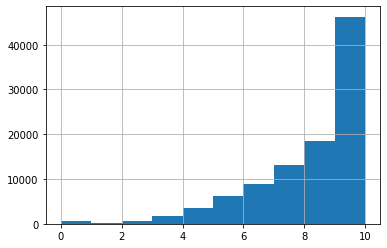

In [8]:
hdf_results["number_of_steps"].hist()

<AxesSubplot:>

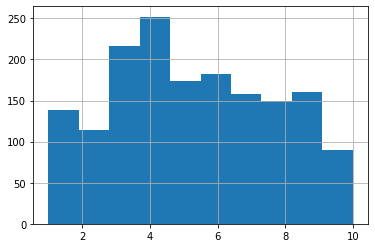

In [9]:
# get solved molecules
solved_molecules = hdf_results[hdf_results["is_solved"] == True]
solved_molecules["number_of_steps"].hist()

## calculate results on desired molecules

In [10]:
dataframe_with_values = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/baseline_qsar_only/generated_molecules/Q99685_qsar_only_400ep_final_cleaned.csv"
dataframe_with_values = pandas.read_csv(dataframe_with_values)
dataframe_with_values.head()

,LED3Chembl200kScorer,XGBClassifier,XGBRegressor,SA,SMILES,clean_smiles,clean_smiles_inchi
0,0.000033,0.766286,6.003978,8.241295,NC=CC(NOOC(F)(F)CC(F)CNCCCC1=C2CC(=O)C=CC=C3C(...,NC=CC(NOOC(F)(F)CC(F)CNCCCC1=C2CC(=O)C=CC=C3C(...,"InChI=1S/C40H54F9N7O7/c41-23(17-38(45,46)62-63..."
1,0.000100,0.904507,6.724371,7.505904,CCCC1C2OCNCCC12N(F)OOC12CC1CCC13CC(CC14OC4=O)N...,CCCC1C2OCNCCC12N(F)OOC12CC1CCC13CC(CC14OC4=O)N...,"InChI=1S/C41H42F4N6O12/c1-2-4-23-31-38(23,9-10..."
2,0.000066,0.766255,5.995746,6.206702,O=CCCCCCCOCCC1CCC2OCC3NCCOC4CC(c5c(Br)cccc5C(O...,O=CCCCCCCOCCC1CCC2OCC3NCCOC4CC(c5c(Br)cccc5C(O...,InChI=1S/C44H56BrClF8N2O9/c45-28-9-6-8-25(30(5...
3,0.000153,0.877364,6.686712,8.598163,NC1CC23CC2C(CC3CNCCl)C1NC(O)CCOCCC1C(F)C2OC(O)...,NC1CC23CC2C(CC3CNCCl)C1NC(O)CCOCCC1C(F)C2OC(O)...,InChI=1S/C36H46ClF16N7O7/c37-15-55-11-16-8-17-...
4,0.000032,0.882524,6.677220,8.777026,CCCCCCC1OC23C(CC=O)C4(N(F)F)C2OCNC(C(=O)n2ncnn...,CCCCCCC1OC23C(CC=O)C4(N(F)F)C2OCNC(C(=O)n2ncnn...,InChI=1S/C38H44F6N10O8/c1-3-4-5-6-7-19-52-36(3...


In [11]:
# assert that the target column is the same for azf_results and csv_result
assert (hdf_results["target"] == dataframe_with_values["clean_smiles"]).all(), "The target column and clean_smiles columns are not the same"

AssertionError: The target column and clean_smiles columns are not the same

In [12]:
# get the differences between the target and clean smiles
hdf_results[hdf_results["target"] != dataframe_with_values["clean_smiles"]]

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
2681,1,CC(F)C12C3C4C(=O)N4C45C3C43CC15C(CN(C)C(=O)OC(...,900.444353,0.0,0,2551,10,23,418,0,...,7,7,6,"O=C(Cl)OC(C(F)(F)F)C(F)(F)F, CN=C=O, OCc1ccccc...",CC(F)C12C3C4C(=O)N4C45C3C43c4cc6cc7c4OC(O7)C4C...,zinc;zinc;zinc;zinc;Not in stock;zinc;zinc,{'uspto': 2550},"{'expansion_calls': 2240, 'reactants_generatio...","0.8167, 0.8146, 0.7940, 0.7940, 0.7940, 0.7940...","[{'type': 'mol', 'hide': False, 'smiles': 'CC(..."
4549,9,O=NC(NC(=O)NC(=O)N1C(Oc2cccc(Br)c2)C(=O)C(=O)N...,904.562860,0.0,0,2878,10,19,450,0,...,10,8,6,"Oc1ccccc1, O=C(Cl)Cl, CC(C)(C)OC(=O)OC(=O)OC(C...","[N-]=[N+]=NC(N=O)C(F)(F)F, CCOC(=O)C(=O)C(NC(C...",zinc;zinc;zinc;Not in stock;zinc;zinc;zinc;Not...,{'uspto': 2877},"{'expansion_calls': 2429, 'reactants_generatio...","0.7126, 0.6795, 0.6795, 0.6795, 0.6795, 0.6795","[{'type': 'mol', 'hide': False, 'smiles': 'O=N..."
14429,9,CC1C2CC(COC3OC34C3CC5N6CCC(F)CCC7(C8OC58C(=C5O...,900.118314,0.0,0,6232,10,36,1831,0,...,6,3,2,"O=C(O)c1ccccc1, CC(C)(C)O",CC1C2CC(COC3OC34C3CC5N6C78CCC9(CN7CC(CCC(F)CC6...,zinc;zinc;Not in stock,{'uspto': 6231},"{'expansion_calls': 4405, 'reactants_generatio...","0.6393, 0.6357, 0.6357, 0.6357, 0.6357","[{'type': 'mol', 'hide': False, 'smiles': 'CC1..."
16079,9,CCC1C2CCCC2CC(=O)C2C1N(C=O)C21C2OC(C(=O)OF)N(C...,902.886575,0.0,0,3033,10,22,444,0,...,6,3,2,"CC(C)(C)OC(=O)OC(=O)OC(C)(C)C, O=C(Cl)OCc1ccccc1",CCC1C2CCCC2CC(=O)C2C1N(C=O)C21C2C3C45OC6C7NOC1...,zinc;Not in stock;zinc,{'uspto': 3032},"{'expansion_calls': 2589, 'reactants_generatio...","0.6393, 0.6393, 0.6393, 0.6393, 0.6357","[{'type': 'mol', 'hide': False, 'smiles': 'CCC..."
18221,1,O=CC1C2C3C4CNC(=O)C56C7C5C5C8N9N(C(F)COC(F)F)O...,901.139302,0.0,0,3801,10,32,565,0,...,9,5,4,"COc1ccc(C=O)cc1, CC(=O)O, CC(C)(C)OC(=O)OC(=O)...",CCOC(OCc1ccccc1)C1C2C3CN4C5CC67c8cc(Cl)ccc8C8(...,zinc;zinc;zinc;Not in stock;zinc,{'uspto': 3800},"{'expansion_calls': 3244, 'reactants_generatio...","0.7603, 0.7603, 0.7601, 0.7601, 0.7601","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
30810,0,CNC12COC(=O)C3(N)C4C3C41C1CC3CCC4C(C5CCC(=O)N5...,900.806643,0.0,0,5093,10,27,1450,0,...,10,8,7,"OC(C(F)(F)F)C(F)(F)F, O=C1CCC(=O)N1O, O=C(O)O,...",CN(C(=O)Cl)C12COC(=O)C3(N=[N+]=[N-])C4C3C41C1C...,zinc;zinc;zinc;zinc;zinc;zinc;Not in stock;zinc,{'uspto': 5092},"{'expansion_calls': 3672, 'reactants_generatio...","0.8314, 0.8314, 0.8146, 0.8146, 0.8146","[{'type': 'mol', 'hide': False, 'smiles': 'CNC..."
40917,7,CNC1CC2C3CN1CC14NCC(CC(=O)C(=O)NC(F)(F)F)C(=O)...,901.420641,0.0,0,12601,10,38,5406,0,...,6,3,2,"O=C(O)C(F)(F)F, CC(C)(C)OC(N)=O",CNC1CC2C3CN1CC14N(C(=O)OCc5ccccc5)CC(CC(=O)C(=...,zinc;zinc;Not in stock,{'uspto': 12600},"{'expansion_calls': 7196, 'reactants_generatio...","0.6393, 0.6357, 0.6357, 0.6357, 0.6342, 0.6342...","[{'type': 'mol', 'hide': False, 'smiles': 'CNC..."
47249,9,CN1CCOC2C3(C)OC3CCOCCC3=COCC4COC=CCCCC5OC6(C4C...,902.633369,0.0,0,2420,10,11,426,0,...,10,8,7,"CC(C)(O)C(C)(C)O, CC(C)(O)C(C)(C)O, OB(O)B(O)O...",CN1CCOC2C3(C)OC3CCOCCC3=COCC4COC=CCCCC5OC6(C4C...,zinc;zinc;zinc;zinc;zinc;zinc;zinc;Not in stock,{'uspto': 2419},"{'expansion_calls': 2089, 'reactants_generatio...","0.8314, 0.8314, 0.8314, 0.8314, 0.8314, 0.8314...","[{'type': 'mol', 'hide': False, 'smiles': 'CN1..."
59432,2,CC12C3C4(CC314)C13OC(=O)C4c5cc6c(c4c5-c4ccccc4...,900.399003,0.0,0,1715,10,18,577,0,...,9,6,5,"Brc1ccc(Br)cc1, CC(C)(O)C(C)(C)O, CC(C)(O)C(C)...",CC(C)(C)OC(=O)N1C2COC(C(F)(F)F)OC(F)(F)C34OC5O...,zinc;zinc;zinc;zinc;zinc;Not in stock,{'uspto': 1714},"{'expansion_calls': 1242, 'reactants_generatio...","0.7920, 0.7920, 0.7920, 0.7920, 0.7918","[{'type': 'mol', 'hide': False, 'smiles': 'CC1..."
63876,6,CCOC1OCC2C1C1N3CC14CCCN4OC1CC(=

In [13]:
# calculate the inchis for the target column
from rdkit import Chem

def calculate_inchi(smiles):
    mol = Chem.MolFromSmiles(smiles)
    inchi = Chem.MolToInchi(mol)
    return inchi

hdf_results["target_inchi"] = hdf_results["target"].apply(calculate_inchi)

In [14]:
# do a compariosn between the target column and the clean_smiles column on inchi basis because smiles are disambigious
assert (hdf_results["target_inchi"] == dataframe_with_values["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"

#print the unique length and the normal length of the inchi column
print("The unique length of the inchi column: ", len(hdf_results["target_inchi"].unique()))
print("The normal length of the inchi column: ", len(hdf_results["target_inchi"]))

print("No join possible!")
hdf_results[hdf_results["target_inchi"] != dataframe_with_values["clean_smiles_inchi"]]

The unique length of the inchi column:  99996
The normal length of the inchi column:  100000
No join possible!


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees,target_inchi


In [15]:
# add the dataframe_with_values to the hdf_results for the columns LED3Scorer XGBClassifier	XGBRegressor clean_smiles_inchi
hdf_results["LED3Chembl200kScorer"] = dataframe_with_values["LED3Chembl200kScorer"]
hdf_results["XGBClassifier"] = dataframe_with_values["XGBClassifier"]
hdf_results["XGBRegressor"] = dataframe_with_values["XGBRegressor"]
hdf_results["SA"] = dataframe_with_values["SA"]
hdf_results["clean_smiles_inchi"] = dataframe_with_values["clean_smiles_inchi"]

assert (hdf_results["target_inchi"] == hdf_results["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"

hdf_results.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,policy_used_counts,profiling,top_scores,trees,target_inchi,LED3Chembl200kScorer,XGBClassifier,XGBRegressor,SA,clean_smiles_inchi
0,0,NC=CC(NOOC(F)(F)CC(F)CNCCCC1=C2CC(=O)C=CC=C3C(...,902.733842,0.0,0,4900,10,24,1637,0,...,{'uspto': 4899},"{'expansion_calls': 3264, 'reactants_generatio...","0.8144, 0.7926, 0.7926, 0.7920, 0.7624","[{'type': 'mol', 'hide': False, 'smiles': 'NC=...","InChI=1S/C40H54F9N7O7/c41-23(17-38(45,46)62-63...",0.000033,0.766286,6.003978,8.241295,"InChI=1S/C40H54F9N7O7/c41-23(17-38(45,46)62-63..."
1,1,CCCC1C2OCNCCC12N(F)OOC12CC1CCC13CC(CC14OC4=O)N...,900.757405,0.0,0,6205,10,26,2068,0,...,{'uspto': 6204},"{'expansion_calls': 4140, 'reactants_generatio...","0.7624, 0.7624, 0.7624, 0.7624, 0.7609","[{'type': 'mol', 'hide': False, 'smiles': 'CCC...","InChI=1S/C41H42F4N6O12/c1-2-4-23-31-38(23,9-10...",0.000100,0.904507,6.724371,7.505904,"InChI=1S/C41H42F4N6O12/c1-2-4-23-31-38(23,9-10..."
2,2,O=CCCCCCCOCCC1CCC2OCC3NCCOC4CC(c5c(Br)cccc5C(O...,900.989177,0.0,0,4829,10,33,1666,0,...,{'uspto': 4828},"{'expansion_calls': 3211, 'reactants_generatio...","0.7603, 0.7603, 0.7601, 0.7185, 0.7149","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C44H56BrClF8N2O9/c45-28-9-6-8-25(30(5...,0.000066,0.766255,5.995746,6.206702,InChI=1S/C44H56BrClF8N2O9/c45-28-9-6-8-25(30(5...
3,3,NC1CC23CC2C(CC3CNCCl)C1NC(O)CCOCCC1C(F)C2OC(O)...,900.101267,0.0,0,4716,10,31,1271,0,...,{'uspto': 4715},"{'expansion_calls': 3446, 'reactants_generatio...","0.7734, 0.7734, 0.7734, 0.7734, 0.7734, 0.7734...","[{'type': 'mol', 'hide': False, 'smiles': 'NC1...",InChI=1S/C36H46ClF16N7O7/c37-15-55-11-16-8-17-...,0.000153,0.877364,6.686712,8.598163,InChI=1S/C36H46ClF16N7O7/c37-15-55-11-16-8-17-...
4,4,CCCCCCC1OC23C(CC=O)C4(N(F)F)C2OCNC(C(=O)n2ncnn...,900.684647,0.0,0,4950,10,22,1720,0,...,{'uspto': 4949},"{'expansion_calls': 3233, 'reactants_generatio...","0.7603, 0.7603, 0.7603, 0.7603, 0.7603, 0.7603...","[{'type': 'mol', 'hide': False, 'smiles': 'CCC...",InChI=1S/C38H44F6N10O8/c1-3-4-5-6-7-19-52-36(3...,0.000032,0.882524,6.677220,8.777026,InChI=1S/C38H44F6N10O8/c1-3-4-5-6-7-19-52-36(3...


## confusion matrix

NOTE THESE VALUES ARE FOR THE PREDICTIONS WITH THE LED3CHEMBL200KSCORER WHICH IS NOT USED HERE!!! CAREFUL!!!
The accuracy:  0.98971
The precision:  0.6637837837837838
The recall:  0.7510703363914373
The f1 score:  0.7047345767575324
The mcc:  0.7009013447092788


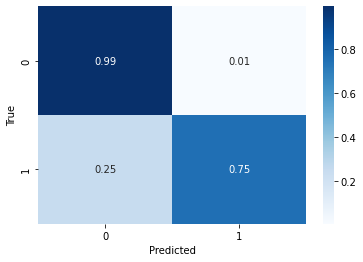

In [16]:
predicted_solved = hdf_results["LED3Chembl200kScorer"] > 0.5
solved = hdf_results["is_solved"]

print("NOTE THESE VALUES ARE FOR THE PREDICTIONS WITH THE LED3CHEMBL200KSCORER WHICH IS NOT USED HERE!!! CAREFUL!!!")
# calculate the accuracy
from sklearn.metrics import accuracy_score
print("The accuracy: ", accuracy_score(solved, predicted_solved))

# calculate the precision
from sklearn.metrics import precision_score
print("The precision: ", precision_score(solved, predicted_solved))

# calculate the recall
from sklearn.metrics import recall_score
print("The recall: ", recall_score(solved, predicted_solved))

# calculate the f1 score
from sklearn.metrics import f1_score
print("The f1 score: ", f1_score(solved, predicted_solved))

# calculate the mcc
from sklearn.metrics import matthews_corrcoef
print("The mcc: ", matthews_corrcoef(solved, predicted_solved))

# visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# normalized

confusion_matrix = confusion_matrix(solved, predicted_solved)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, numpy.newaxis]
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
# NOTE THESE VALUES ARE FOR THE PREDICTIONS WITH THE LED3CHEMBL200KSCORER WHICH IS NOT USED HERE!!! CAREFUL

In [ ]:
## clustering

In [ ]:
from multiretro.data.logic.fingerprints.fingerprints import BinaryMorganFingerprint
from multiretro.data.logic.fingerprints.fingerprint_generator import FingerprintGenerator
from multiretro.visualization.logic.umapVisualization import UmapVisualizer

# generate fingerprints
morganFingerprint = BinaryMorganFingerprint(transform_to_numpy_array=False, radius=2, number_of_bits= 1024, use_features= False)
fingerprint_generator = FingerprintGenerator(fingerprint = morganFingerprint)
clustered_azf_results = fingerprint_generator.create_fingerprints_pandas_dataframe(data_frame = hdf_results, smiles_column = "target", fingerprint_column = "fingerprint")

umapVisualizer = UmapVisualizer(dataFrame=clustered_azf_results, dimensions=2)
umapVisualizer.transformRdkitColumn2NumpyArray(columnName="fingerprint", newColumnName="fingerprint_numpy_array")
umapVisualizer.transformNumpyArrayColumnn2NumpyMatrix(columnName="fingerprint_numpy_array")
umapVisualizer.calculateUmapMapper()
umapVisualizer.extractUmapEmbeddings()
#umapVisualizer.calculateMarkerSize(boolean_row = "Centroid")
umapDataFrame = umapVisualizer.getVisualizationDataFrame()
umapDataFrame = umapDataFrame.reset_index(drop = True)

# multiply the max_transforms by -1
umapDataFrame["number_of_steps_marker"] = umapDataFrame["number_of_steps"] * -1

# minmax scale the max_transforms_marker column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 25))
umapDataFrame["number_of_steps_marker"] = scaler.fit_transform(umapDataFrame[["number_of_steps_marker"]])
umapDataFrame["real_index"] = umapDataFrame.index.to_list()

# visualize the molecules
#umapVisualizer = UmapVisualizer(dataFrame=umapDataFrame)
#app = umapVisualizer.createMolPlotlyVisualization(smilesColumn = 'target', maximumMarkerSize = 25, size = "number_of_steps_marker", colorColumn = "is_solved", captionColumns = ["real_index", "is_solved","target","number_of_steps","LED3Scorer","XGBClassifier","XGBRegressor"])
#app.run_server(mode='jupyterlab',host='0.0.0.0', port=8000, debug=False, proxy=None, use_reloader=False)


# On Alice: ssh -L 8000:localhost:8000 node802
# At Home: ssh -L 8000:localhost:8000 hpc1

In [19]:
print(umapDataFrame.columns)

umapDataFrame = umapDataFrame.drop(columns=['trees', 'fingerprint', 'fingerprint_numpy_array'])
print(len(umapDataFrame))
umapDataFrame.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees',
       'target_inchi', 'LED3Chembl200kScorer', 'XGBClassifier', 'XGBRegressor',
       'SA', 'clean_smiles_inchi', 'fingerprint', 'fingerprint_numpy_array',
       'x', 'y', 'number_of_steps_marker', 'real_index'],
      dtype='object')
100000


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,target_inchi,LED3Chembl200kScorer,XGBClassifier,XGBRegressor,SA,clean_smiles_inchi,x,y,number_of_steps_marker,real_index
0,0,NC=CC(NOOC(F)(F)CC(F)CNCCCC1=C2CC(=O)C=CC=C3C(...,902.733842,0.0,0,4900,10,24,1637,0,...,"InChI=1S/C40H54F9N7O7/c41-23(17-38(45,46)62-63...",0.000033,0.766286,6.003978,8.241295,"InChI=1S/C40H54F9N7O7/c41-23(17-38(45,46)62-63...",8.171347,1.046789,5.0,0
1,1,CCCC1C2OCNCCC12N(F)OOC12CC1CCC13CC(CC14OC4=O)N...,900.757405,0.0,0,6205,10,26,2068,0,...,"InChI=1S/C41H42F4N6O12/c1-2-4-23-31-38(23,9-10...",0.000100,0.904507,6.724371,7.505904,"InChI=1S/C41H42F4N6O12/c1-2-4-23-31-38(23,9-10...",11.325707,4.960860,11.0,1
2,2,O=CCCCCCCOCCC1CCC2OCC3NCCOC4CC(c5c(Br)cccc5C(O...,900.989177,0.0,0,4829,10,33,1666,0,...,InChI=1S/C44H56BrClF8N2O9/c45-28-9-6-8-25(30(5...,0.000066,0.766255,5.995746,6.206702,InChI=1S/C44H56BrClF8N2O9/c45-28-9-6-8-25(30(5...,9.671523,4.171163,7.0,2
3,3,NC1CC23CC2C(CC3CNCCl)C1NC(O)CCOCCC1C(F)C2OC(O)...,900.101267,0.0,0,4716,10,31,1271,0,...,InChI=1S/C36H46ClF16N7O7/c37-15-55-11-16-8-17-...,0.000153,0.877364,6.686712,8.598163,InChI=1S/C36H46ClF16N7O7/c37-15-55-11-16-8-17-...,10.643402,3.256891,15.0,3
4,4,CCCCCCC1OC23C(CC=O)C4(N(F)F)C2OCNC(C(=O)n2ncnn...,900.684647,0.0,0,4950,10,22,1720,0,...,InChI=1S/C38H44F6N10O8/c1-3-4-5-6-7-19-52-36(3...,0.000032,0.882524,6.677220,8.777026,InChI=1S/C38H44F6N10O8/c1-3-4-5-6-7-19-52-36(3...,12.947633,3.044173,7.0,4


In [20]:
save_path = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/baseline_qsar_only/planning_results/zinc_building_blocks/ZINC_BB_Q99685_QSAR_BASELINE_ONLY_FULL_MODEL_results.csv"
#umapDataFrame.to_csv(save_path)

## desired molecules (LED3Scorer, XGBClassifier > 0.8)

In [21]:
xgb_molecules = hdf_results[hdf_results["XGBClassifier"] > 0.8]
print("The number of molecules with a XGBClassifier score higher than 0.8: ", len(xgb_molecules))

xgb_molecules_solved = xgb_molecules[xgb_molecules["is_solved"] == True]
print("The number of molecules with a XGBClassifier score higher than 0.8 and are solved: ", len(xgb_molecules_solved))

led3_molecules = hdf_results[hdf_results["LED3Chembl200kScorer"] > 0.8]
print("The number of molecules with a LED3 score higher than 0.8: ", len(led3_molecules))
short_list = hdf_results[(hdf_results["LED3Chembl200kScorer"] > 0.8) & (hdf_results["XGBClassifier"] > 0.8)]
print("The number of molecules with a LED3 score higher than 0.8 and a XGBClassifier score higher than 0.8: ", len(short_list))

The number of molecules with a XGBClassifier score higher than 0.8:  76828
The number of molecules with a XGBClassifier score higher than 0.8 and are solved:  883
The number of molecules with a LED3 score higher than 0.8:  1345
The number of molecules with a LED3 score higher than 0.8 and a XGBClassifier score higher than 0.8:  652


In [22]:
# reset index of shortlist
short_list = short_list.reset_index(drop = True)
short_list.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,target_inchi,LED3Chembl200kScorer,XGBClassifier,XGBRegressor,SA,clean_smiles_inchi,fingerprint,fingerprint_numpy_array,x,y
0,1,O=C(N1CCN(Cc2ccccc2)CC1)n1nnc2ccccc21,0.343253,0.343189,1,4,3,1,1,1,...,InChI=1S/C18H19N5O/c24-18(23-17-9-5-4-8-16(17)...,0.997777,0.984754,8.102117,2.031669,InChI=1S/C18H19N5O/c24-18(23-17-9-5-4-8-16(17)...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",14.880295,2.624306
1,6,O=C(ON(C(F)(F)F)C(F)(F)F)N1CCN(C(c2ccccc2)c2cc...,901.437940,0.000000,0,2919,10,57,742,0,...,"InChI=1S/C20H19F6N3O2/c21-19(22,23)29(20(24,25...",0.960965,0.852249,7.247916,2.686357,"InChI=1S/C20H19F6N3O2/c21-19(22,23)29(20(24,25...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",11.128247,0.368170
2,2,O=C(N1CCN(c2cccc(F)c2)CC1)n1nnc2ccccc21,0.387487,0.387423,1,4,3,1,1,1,...,InChI=1S/C17H16FN5O/c18-13-4-3-5-14(12-13)21-8...,0.993951,0.989687,7.675053,2.174780,InChI=1S/C17H16FN5O/c18-13-4-3-5-14(12-13)21-8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",14.885352,2.631946
3,8,Cc1ccccc1N1CCN(C(=O)n2nnc3ccccc32)CC1,0.098483,0.098417,1,2,1,1,1,1,...,InChI=1S/C18H19N5O/c1-14-6-2-4-8-16(14)21-10-1...,0.989929,0.976997,7.187729,2.128472,InChI=1S/C18H19N5O/c1-14-6-2-4-8-16(14)21-10-1...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",14.913651,2.645294
4,9,Cc1cc(N2CCN(C(=O)n3nnc4ccccc43)CC2)ccc1[N+](=O...,0.321275,0.321225,1,4,3,1,1,1,...,InChI=1S/C18H18N6O3/c1-13-12-14(6-7-16(13)24(2...,0.993745,0.962236,7.369373,2.366593,InChI=1S/C18H18N6O3/c1-13-12-14(6-7-16(13)24(2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",14.973065,3.078548


In [23]:
provided_short_list = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/baseline_qsar_only/generated_molecules/Q99685_qsar_only_400ep_final_shortlist.csv"
provided_short_list = pandas.read_csv(provided_short_list)
print(len(provided_short_list))
provided_short_list["clean_smiles_inchi"] = provided_short_list["SMILES"].apply(calculate_inchi)
provided_short_list.head()

652


,SMILES,LED3Chembl200kScorer,XGBClassifier,XGBRegressor,SA,closest_training_molecule_similarity,closest_training_molecule,clean_smiles_inchi
0,O=C(N1CCN(Cc2ccccc2)CC1)n1nnc2ccccc21,0.997777,0.984754,8.102117,2.031669,1.000000,O=C(N1CCN(Cc2ccccc2)CC1)n1nnc2c1cccc2,InChI=1S/C18H19N5O/c24-18(23-17-9-5-4-8-16(17)...
1,O=C(ON(C(F)(F)F)C(F)(F)F)N1CCN(C(c2ccccc2)c2cc...,0.960965,0.852249,7.247916,2.686357,0.583333,O=C(Oc1ccccc1)N1CCN(C(c2ccccc2)c2ccccc2)CC1,"InChI=1S/C20H19F6N3O2/c21-19(22,23)29(20(24,25..."
2,O=C(N1CCN(c2cccc(F)c2)CC1)n1nnc2ccccc21,0.993951,0.989687,7.675053,2.174780,0.691176,O=C(N1CCN(c2ccccc2)CC1)n1nnc2c1cccc2,InChI=1S/C17H16FN5O/c18-13-4-3-5-14(12-13)21-8...
3,Cc1ccccc1N1CCN(C(=O)n2nnc3ccccc32)CC1,0.989929,0.976997,7.187729,2.128472,1.000000,Cc1c(N2CCN(C(=O)n3nnc4c3cccc4)CC2)cccc1,InChI=1S/C18H19N5O/c1-14-6-2-4-8-16(14)21-10-1...
4,Cc1cc(N2CCN(C(=O)n3nnc4ccccc43)CC2)ccc1[N+](=O...,0.993745,0.962236,7.369373,2.366593,0.722892,CN(C)C(=O)c1c([N+](=O)[O-])ccc(N2CCN(C(=O)n3nn...,InChI=1S/C18H18N6O3/c1-13-12-14(6-7-16(13)24(2...


In [24]:
# assert that the short_list and provided_short_list are the same target_inchi and clean_smiles_inchi
assert (short_list["target_inchi"] == provided_short_list["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"

In [25]:
short_list["closest_training_molecule_similarity"] = provided_short_list["closest_training_molecule_similarity"]
short_list["closest_training_molecule"] = provided_short_list["closest_training_molecule"]
short_list.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,XGBClassifier,XGBRegressor,SA,clean_smiles_inchi,fingerprint,fingerprint_numpy_array,x,y,closest_training_molecule_similarity,closest_training_molecule
0,1,O=C(N1CCN(Cc2ccccc2)CC1)n1nnc2ccccc21,0.343253,0.343189,1,4,3,1,1,1,...,0.984754,8.102117,2.031669,InChI=1S/C18H19N5O/c24-18(23-17-9-5-4-8-16(17)...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",14.880295,2.624306,1.000000,O=C(N1CCN(Cc2ccccc2)CC1)n1nnc2c1cccc2
1,6,O=C(ON(C(F)(F)F)C(F)(F)F)N1CCN(C(c2ccccc2)c2cc...,901.437940,0.000000,0,2919,10,57,742,0,...,0.852249,7.247916,2.686357,"InChI=1S/C20H19F6N3O2/c21-19(22,23)29(20(24,25...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",11.128247,0.368170,0.583333,O=C(Oc1ccccc1)N1CCN(C(c2ccccc2)c2ccccc2)CC1
2,2,O=C(N1CCN(c2cccc(F)c2)CC1)n1nnc2ccccc21,0.387487,0.387423,1,4,3,1,1,1,...,0.989687,7.675053,2.174780,InChI=1S/C17H16FN5O/c18-13-4-3-5-14(12-13)21-8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",14.885352,2.631946,0.691176,O=C(N1CCN(c2ccccc2)CC1)n1nnc2c1cccc2
3,8,Cc1ccccc1N1CCN(C(=O)n2nnc3ccccc32)CC1,0.098483,0.098417,1,2,1,1,1,1,...,0.976997,7.187729,2.128472,InChI=1S/C18H19N5O/c1-14-6-2-4-8-16(14)21-10-1...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",14.913651,2.645294,1.000000,Cc1c(N2CCN(C(=O)n3nnc4c3cccc4)CC2)cccc1
4,9,Cc1cc(N2CCN(C(=O)n3nnc4ccccc43)CC2)ccc1[N+](=O...,0.321275,0.321225,1,4,3,1,1,1,...,0.962236,7.369373,2.366593,InChI=1S/C18H18N6O3/c1-13-12-14(6-7-16(13)24(2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",14.973065,3.078548,0.722892,CN(C)C(=O)c1c([N+](=O)[O-])ccc(N2CCN(C(=O)n3nn...


In [26]:
# print the number of molecules in the short list
print("The number of molecules in the short list: ", len(short_list))

# get the number of molecules in the short list that are solved
print("The number of molecules in the short list that are solved:", len(short_list[short_list["is_solved"] == True]))

# percentage of solved molecules in the short list
print("The percentage of solved molecules in the short list: ", len(short_list[short_list["is_solved"] == True]) / len(short_list))

The number of molecules in the short list:  652
The number of molecules in the short list that are solved: 530
The percentage of solved molecules in the short list:  0.8128834355828221


<AxesSubplot:>

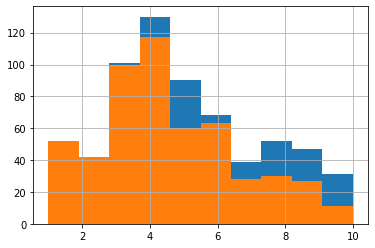

In [27]:
# hist of the number of steps for the short list
short_list["number_of_steps"].hist()

# hist in the short list that are solved
short_list[short_list["is_solved"] == True]["number_of_steps"].hist()

<AxesSubplot:>

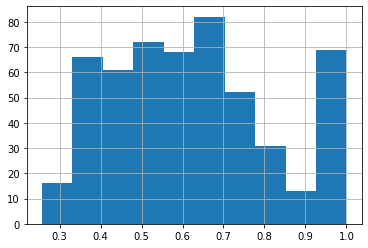

In [28]:
short_list[short_list["is_solved"] == True]["closest_training_molecule_similarity"].hist()

In [30]:
# solved and tanimoto similarity < 0.6

short_list["solved_and_unique"] = short_list["is_solved"] & (short_list["closest_training_molecule_similarity"] < 0.6)

# get the number of molecules in the short list that are solved and unique
print("The number of molecules in the short list that are solved and unique:", len(short_list[short_list["solved_and_unique"] == True]))

The number of molecules in the short list that are solved and unique: 251


## umap clustering

In [ ]:
from multiretro.data.logic.fingerprints.fingerprints import BinaryMorganFingerprint
from multiretro.data.logic.fingerprints.fingerprint_generator import FingerprintGenerator
from multiretro.visualization.logic.umapVisualization import UmapVisualizer

# generate fingerprints
morganFingerprint = BinaryMorganFingerprint(transform_to_numpy_array=False, radius=2, number_of_bits= 1024, use_features= False)
fingerprint_generator = FingerprintGenerator(fingerprint = morganFingerprint)
clustered_azf_results = fingerprint_generator.create_fingerprints_pandas_dataframe(data_frame = short_list, smiles_column = "target", fingerprint_column = "fingerprint")

umapVisualizer = UmapVisualizer(dataFrame=clustered_azf_results, dimensions=2)
umapVisualizer.transformRdkitColumn2NumpyArray(columnName="fingerprint", newColumnName="fingerprint_numpy_array")
umapVisualizer.transformNumpyArrayColumnn2NumpyMatrix(columnName="fingerprint_numpy_array")
umapVisualizer.calculateUmapMapper()
umapVisualizer.extractUmapEmbeddings()
#umapVisualizer.calculateMarkerSize(boolean_row = "Centroid")
umapDataFrame = umapVisualizer.getVisualizationDataFrame()
umapDataFrame = umapDataFrame.reset_index(drop = True)

# multiply the max_transforms by -1
umapDataFrame["number_of_steps_marker"] = umapDataFrame["number_of_steps"] * -1

# minmax scale the max_transforms_marker column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 25))
umapDataFrame["number_of_steps_marker"] = scaler.fit_transform(umapDataFrame[["number_of_steps_marker"]])
umapDataFrame["real_index"] = umapDataFrame.index.to_list()

# visualize the molecules
#umapVisualizer = UmapVisualizer(dataFrame=umapDataFrame)
#app = umapVisualizer.createMolPlotlyVisualization(smilesColumn = 'target', maximumMarkerSize = 25, size = "number_of_steps_marker", colorColumn = "solved_and_unique", captionColumns = ["real_index", "is_solved","target","number_of_steps","LED3Scorer","XGBClassifier","XGBRegressor", "closest_training_molecule_similarity", "closest_training_molecule"])
#app.run_server(mode='jupyterlab',host='0.0.0.0', port=8000, debug=False, proxy=None, use_reloader=False)


# On Alice: ssh -L 8000:localhost:8000 node802
# At Home: ssh -L 8000:localhost:8000 hpc1


In [32]:
print(umapDataFrame.columns)

# remove 'trees', 'molecule_results', 'fingerprint', 'fingerprint_numpy_array', columns
umapDataFrame = umapDataFrame.drop(columns=['trees', 'fingerprint', 'fingerprint_numpy_array'])

umapDataFrame.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees',
       'target_inchi', 'LED3Chembl200kScorer', 'XGBClassifier', 'XGBRegressor',
       'SA', 'clean_smiles_inchi', 'fingerprint', 'fingerprint_numpy_array',
       'x', 'y', 'closest_training_molecule_similarity',
       'closest_training_molecule', 'solved_and_unique',
       'number_of_steps_marker', 'real_index'],
      dtype='object')


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,XGBRegressor,SA,clean_smiles_inchi,x,y,closest_training_molecule_similarity,closest_training_molecule,solved_and_unique,number_of_steps_marker,real_index
0,1,O=C(N1CCN(Cc2ccccc2)CC1)n1nnc2ccccc21,0.343253,0.343189,1,4,3,1,1,1,...,8.102117,2.031669,InChI=1S/C18H19N5O/c24-18(23-17-9-5-4-8-16(17)...,12.258103,11.693140,1.000000,O=C(N1CCN(Cc2ccccc2)CC1)n1nnc2c1cccc2,False,20.555556,0
1,6,O=C(ON(C(F)(F)F)C(F)(F)F)N1CCN(C(c2ccccc2)c2cc...,901.437940,0.000000,0,2919,10,57,742,0,...,7.247916,2.686357,"InChI=1S/C20H19F6N3O2/c21-19(22,23)29(20(24,25...",7.556033,0.217267,0.583333,O=C(Oc1ccccc1)N1CCN(C(c2ccccc2)c2ccccc2)CC1,False,18.333333,1
2,2,O=C(N1CCN(c2cccc(F)c2)CC1)n1nnc2ccccc21,0.387487,0.387423,1,4,3,1,1,1,...,7.675053,2.174780,InChI=1S/C17H16FN5O/c18-13-4-3-5-14(12-13)21-8...,10.011792,10.923578,0.691176,O=C(N1CCN(c2ccccc2)CC1)n1nnc2c1cccc2,False,20.555556,2
3,8,Cc1ccccc1N1CCN(C(=O)n2nnc3ccccc32)CC1,0.098483,0.098417,1,2,1,1,1,1,...,7.187729,2.128472,InChI=1S/C18H19N5O/c1-14-6-2-4-8-16(14)21-10-1...,10.933263,10.513225,1.000000,Cc1c(N2CCN(C(=O)n3nnc4c3cccc4)CC2)cccc1,False,25.000000,3
4,9,Cc1cc(N2CCN(C(=O)n3nnc4ccccc43)CC2)ccc1[N+](=O...,0.321275,0.321225,1,4,3,1,1,1,...,7.369373,2.366593,InChI=1S/C18H18N6O3/c1-13-12-14(6-7-16(13)24(2...,10.744788,9.590230,0.722892,CN(C)C(=O)c1c([N+](=O)[O-])ccc(N2CCN(C(=O)n3nn...,False,20.555556,4


In [33]:
#umapDataFrame.to_csv("<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/baseline_qsar_only/planning_results/zinc_building_blocks/ZINC_BB_Q99685_QSAR_BASELINE_ONLY_FULL_MODEL_results_shortlist.csv")